## Logic Based FizzBuzz Function [Software 1.0]

In [1]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'fizzbuzz'
    elif n % 3 == 0:
        return 'fizz'
    elif n % 5 == 0:
        return 'buzz'
    else:
        return 'other'

## Create Training and Testing Datasets in CSV Format

In [2]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [3]:
def processData(dataset):
    
    # Why do we have to process?
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [4]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [6]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "fizzbuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # Why use Dense layer and then activation?
    # Why use sequential model with layers?
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    
    model.summary()
    
    # Why use categorical_crossentropy?
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [8]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [12]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2816      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [13]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 391us/step - loss: 1.2543 - acc: 0.4847 - val_loss: 1.1644 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 36us/step - loss: 1.1735 - acc: 0.5347 - val_loss: 1.1497 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 40us/step - loss: 1.1642 - acc: 0.5333 - val_loss: 1.1509 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 49us/step - loss: 1.1511 - acc: 0.5333 - val_loss: 1.1504 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 40us/step - loss: 1.1448 - acc: 0.5333 - val_loss: 1.1513 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 42us/step - loss: 1.1437 - acc: 0.5333 - val_loss: 1.1545 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 43us/step - loss: 1.1398 - acc: 0.5333 - val_loss: 1.1545 - val_acc: 0.5333
E

720/720 [==============================] - 0s 50us/step - loss: 1.0540 - acc: 0.5417 - val_loss: 1.1244 - val_acc: 0.5333
Epoch 61/10000
720/720 [==============================] - 0s 43us/step - loss: 1.0542 - acc: 0.5431 - val_loss: 1.1242 - val_acc: 0.5333
Epoch 62/10000
720/720 [==============================] - 0s 42us/step - loss: 1.0416 - acc: 0.5444 - val_loss: 1.1249 - val_acc: 0.5389
Epoch 63/10000
720/720 [==============================] - 0s 38us/step - loss: 1.0435 - acc: 0.5444 - val_loss: 1.1246 - val_acc: 0.5333
Epoch 64/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0451 - acc: 0.5417 - val_loss: 1.1235 - val_acc: 0.5333
Epoch 65/10000
720/720 [==============================] - 0s 44us/step - loss: 1.0399 - acc: 0.5417 - val_loss: 1.1226 - val_acc: 0.5389
Epoch 66/10000
720/720 [==============================] - 0s 43us/step - loss: 1.0365 - acc: 0.5444 - val_loss: 1.1197 - val_acc: 0.5389
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 43us/step - loss: 0.9225 - acc: 0.5833 - val_loss: 1.0538 - val_acc: 0.5611
Epoch 121/10000
720/720 [==============================] - 0s 42us/step - loss: 0.9081 - acc: 0.6000 - val_loss: 1.0501 - val_acc: 0.5556
Epoch 122/10000
720/720 [==============================] - 0s 46us/step - loss: 0.9222 - acc: 0.6042 - val_loss: 1.0481 - val_acc: 0.5667
Epoch 123/10000
720/720 [==============================] - 0s 46us/step - loss: 0.8992 - acc: 0.6125 - val_loss: 1.0460 - val_acc: 0.5611
Epoch 124/10000
720/720 [==============================] - 0s 40us/step - loss: 0.9018 - acc: 0.5917 - val_loss: 1.0460 - val_acc: 0.5722
Epoch 125/10000
720/720 [==============================] - 0s 44us/step - loss: 0.9116 - acc: 0.6000 - val_loss: 1.0447 - val_acc: 0.5611
Epoch 126/10000
720/720 [==============================] - 0s 47us/step - loss: 0.8977 - acc: 0.6125 - val_loss: 1.0466 - val_acc: 0.5500
Epoch 127/10000
720/720 [=========

Epoch 179/10000
720/720 [==============================] - 0s 47us/step - loss: 0.7930 - acc: 0.6861 - val_loss: 0.9566 - val_acc: 0.6278
Epoch 180/10000
720/720 [==============================] - 0s 44us/step - loss: 0.7764 - acc: 0.6917 - val_loss: 0.9530 - val_acc: 0.6056
Epoch 181/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7781 - acc: 0.6944 - val_loss: 0.9501 - val_acc: 0.6222
Epoch 182/10000
720/720 [==============================] - 0s 49us/step - loss: 0.7692 - acc: 0.6958 - val_loss: 0.9500 - val_acc: 0.6167
Epoch 183/10000
720/720 [==============================] - 0s 44us/step - loss: 0.7695 - acc: 0.7000 - val_loss: 0.9502 - val_acc: 0.6278
Epoch 184/10000
720/720 [==============================] - 0s 44us/step - loss: 0.7618 - acc: 0.6931 - val_loss: 0.9475 - val_acc: 0.6222
Epoch 185/10000
720/720 [==============================] - 0s 49us/step - loss: 0.7716 - acc: 0.7083 - val_loss: 0.9501 - val_acc: 0.6056
Epoch 186/10000
720/720 [=========

720/720 [==============================] - 0s 42us/step - loss: 0.6744 - acc: 0.7694 - val_loss: 0.8643 - val_acc: 0.6722
Epoch 239/10000
720/720 [==============================] - 0s 43us/step - loss: 0.7009 - acc: 0.7319 - val_loss: 0.8691 - val_acc: 0.6389
Epoch 240/10000
720/720 [==============================] - 0s 44us/step - loss: 0.6775 - acc: 0.7431 - val_loss: 0.8618 - val_acc: 0.6778
Epoch 241/10000
720/720 [==============================] - 0s 43us/step - loss: 0.6900 - acc: 0.7472 - val_loss: 0.8636 - val_acc: 0.6556
Epoch 242/10000
720/720 [==============================] - 0s 44us/step - loss: 0.6742 - acc: 0.7542 - val_loss: 0.8572 - val_acc: 0.6889
Epoch 243/10000
720/720 [==============================] - 0s 46us/step - loss: 0.6765 - acc: 0.7444 - val_loss: 0.8600 - val_acc: 0.6889
Epoch 244/10000
720/720 [==============================] - 0s 46us/step - loss: 0.6678 - acc: 0.7667 - val_loss: 0.8574 - val_acc: 0.6611
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 44us/step - loss: 0.5994 - acc: 0.7847 - val_loss: 0.7922 - val_acc: 0.7056
Epoch 298/10000
720/720 [==============================] - 0s 47us/step - loss: 0.5899 - acc: 0.8000 - val_loss: 0.7858 - val_acc: 0.7444
Epoch 299/10000
720/720 [==============================] - 0s 43us/step - loss: 0.6010 - acc: 0.7889 - val_loss: 0.8049 - val_acc: 0.6778
Epoch 300/10000
720/720 [==============================] - 0s 46us/step - loss: 0.6106 - acc: 0.7833 - val_loss: 0.7991 - val_acc: 0.6833
Epoch 301/10000
720/720 [==============================] - 0s 44us/step - loss: 0.5948 - acc: 0.7958 - val_loss: 0.7796 - val_acc: 0.7500
Epoch 302/10000
720/720 [==============================] - 0s 43us/step - loss: 0.5851 - acc: 0.8028 - val_loss: 0.7789 - val_acc: 0.7444
Epoch 303/10000
720/720 [==============================] - 0s 43us/step - loss: 0.5855 - acc: 0.8097 - val_loss: 0.7862 - val_acc: 0.6944
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 50us/step - loss: 0.5734 - acc: 0.7931 - val_loss: 0.7278 - val_acc: 0.7556
Epoch 357/10000
720/720 [==============================] - 0s 44us/step - loss: 0.5050 - acc: 0.8361 - val_loss: 0.7371 - val_acc: 0.7278
Epoch 358/10000
720/720 [==============================] - 0s 44us/step - loss: 0.5548 - acc: 0.8028 - val_loss: 0.7238 - val_acc: 0.7500
Epoch 359/10000
720/720 [==============================] - 0s 44us/step - loss: 0.5424 - acc: 0.8014 - val_loss: 0.7366 - val_acc: 0.7222
Epoch 360/10000
720/720 [==============================] - 0s 43us/step - loss: 0.5128 - acc: 0.8167 - val_loss: 0.7352 - val_acc: 0.7000
Epoch 361/10000
720/720 [==============================] - 0s 42us/step - loss: 0.5252 - acc: 0.8167 - val_loss: 0.7155 - val_acc: 0.7944
Epoch 362/10000
720/720 [==============================] - 0s 43us/step - loss: 0.5499 - acc: 0.8042 - val_loss: 0.7181 - val_acc: 0.7611
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 44us/step - loss: 0.4983 - acc: 0.8222 - val_loss: 0.6841 - val_acc: 0.7556
Epoch 416/10000
720/720 [==============================] - 0s 43us/step - loss: 0.4822 - acc: 0.8403 - val_loss: 0.6919 - val_acc: 0.7500
Epoch 417/10000
720/720 [==============================] - 0s 49us/step - loss: 0.4660 - acc: 0.8611 - val_loss: 0.6703 - val_acc: 0.7722
Epoch 418/10000
720/720 [==============================] - 0s 46us/step - loss: 0.4937 - acc: 0.8292 - val_loss: 0.6888 - val_acc: 0.7500
Epoch 419/10000
720/720 [==============================] - 0s 42us/step - loss: 0.4834 - acc: 0.8292 - val_loss: 0.6750 - val_acc: 0.7722
Epoch 420/10000
720/720 [==============================] - 0s 43us/step - loss: 0.4831 - acc: 0.8500 - val_loss: 0.6943 - val_acc: 0.7167
Epoch 421/10000
720/720 [==============================] - 0s 46us/step - loss: 0.4866 - acc: 0.8278 - val_loss: 0.6716 - val_acc: 0.7722
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 58us/step - loss: 0.4506 - acc: 0.8486 - val_loss: 0.6775 - val_acc: 0.7167
Epoch 475/10000
720/720 [==============================] - 0s 46us/step - loss: 0.4717 - acc: 0.8361 - val_loss: 0.6413 - val_acc: 0.7722
Epoch 476/10000
720/720 [==============================] - 0s 51us/step - loss: 0.4412 - acc: 0.8500 - val_loss: 0.6498 - val_acc: 0.7556
Epoch 477/10000
720/720 [==============================] - 0s 46us/step - loss: 0.4574 - acc: 0.8403 - val_loss: 0.6397 - val_acc: 0.7889
Epoch 478/10000
720/720 [==============================] - 0s 38us/step - loss: 0.4757 - acc: 0.8292 - val_loss: 0.6696 - val_acc: 0.7333
Epoch 479/10000
720/720 [==============================] - 0s 46us/step - loss: 0.4585 - acc: 0.8375 - val_loss: 0.6410 - val_acc: 0.7667
Epoch 480/10000
720/720 [==============================] - 0s 46us/step - loss: 0.4365 - acc: 0.8583 - val_loss: 0.6605 - val_acc: 0.7500
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 44us/step - loss: 0.4149 - acc: 0.8653 - val_loss: 0.6541 - val_acc: 0.7278
Epoch 534/10000
720/720 [==============================] - 0s 47us/step - loss: 0.4062 - acc: 0.8667 - val_loss: 0.6787 - val_acc: 0.7111
Epoch 535/10000
720/720 [==============================] - 0s 43us/step - loss: 0.4368 - acc: 0.8653 - val_loss: 0.6697 - val_acc: 0.7167
Epoch 536/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4335 - acc: 0.8542 - val_loss: 0.6265 - val_acc: 0.7611
Epoch 537/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4142 - acc: 0.8597 - val_loss: 0.6095 - val_acc: 0.8000
Epoch 538/10000
720/720 [==============================] - 0s 47us/step - loss: 0.4167 - acc: 0.8528 - val_loss: 0.6335 - val_acc: 0.7611
Epoch 539/10000
720/720 [==============================] - 0s 42us/step - loss: 0.3976 - acc: 0.8625 - val_loss: 0.6295 - val_acc: 0.7778
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 46us/step - loss: 0.4065 - acc: 0.8667 - val_loss: 0.6185 - val_acc: 0.7833
Epoch 593/10000
720/720 [==============================] - 0s 40us/step - loss: 0.4192 - acc: 0.8514 - val_loss: 0.6147 - val_acc: 0.7778
Epoch 594/10000
720/720 [==============================] - 0s 43us/step - loss: 0.4205 - acc: 0.8694 - val_loss: 0.6038 - val_acc: 0.7889
Epoch 595/10000
720/720 [==============================] - 0s 47us/step - loss: 0.4263 - acc: 0.8514 - val_loss: 0.6040 - val_acc: 0.7778
Epoch 596/10000
720/720 [==============================] - 0s 47us/step - loss: 0.3967 - acc: 0.8667 - val_loss: 0.6174 - val_acc: 0.7611
Epoch 597/10000
720/720 [==============================] - 0s 42us/step - loss: 0.4281 - acc: 0.8444 - val_loss: 0.6202 - val_acc: 0.7778
Epoch 598/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4216 - acc: 0.8389 - val_loss: 0.5877 - val_acc: 0.8167
Epoch 599/10000
720/720 [=========================

720/720 [==============================] - 0s 54us/step - loss: 0.3954 - acc: 0.8431 - val_loss: 0.6476 - val_acc: 0.7389
Epoch 651/10000
720/720 [==============================] - 0s 56us/step - loss: 0.3581 - acc: 0.8764 - val_loss: 0.6161 - val_acc: 0.7667
Epoch 652/10000
720/720 [==============================] - 0s 47us/step - loss: 0.3870 - acc: 0.8681 - val_loss: 0.5905 - val_acc: 0.8056
Epoch 653/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3989 - acc: 0.8597 - val_loss: 0.6182 - val_acc: 0.7611
Epoch 654/10000
720/720 [==============================] - 0s 44us/step - loss: 0.4030 - acc: 0.8556 - val_loss: 0.5818 - val_acc: 0.8333
Epoch 655/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3959 - acc: 0.8694 - val_loss: 0.6035 - val_acc: 0.7778
Epoch 656/10000
720/720 [==============================] - 0s 50us/step - loss: 0.3664 - acc: 0.8847 - val_loss: 0.5896 - val_acc: 0.8278
Epoch 657/10000
720/720 [=========================

720/720 [==============================] - 0s 42us/step - loss: 0.3543 - acc: 0.8833 - val_loss: 0.6007 - val_acc: 0.7722
Epoch 710/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3665 - acc: 0.8750 - val_loss: 0.6449 - val_acc: 0.7500
Epoch 711/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3781 - acc: 0.8611 - val_loss: 0.6503 - val_acc: 0.7389
Epoch 712/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3765 - acc: 0.8722 - val_loss: 0.6412 - val_acc: 0.7444
Epoch 713/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3795 - acc: 0.8569 - val_loss: 0.6303 - val_acc: 0.7389
Epoch 714/10000
720/720 [==============================] - 0s 40us/step - loss: 0.3789 - acc: 0.8653 - val_loss: 0.6484 - val_acc: 0.7500
Epoch 715/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3500 - acc: 0.8694 - val_loss: 0.6547 - val_acc: 0.7167
Epoch 716/10000
720/720 [=========================

720/720 [==============================] - 0s 43us/step - loss: 0.3855 - acc: 0.8653 - val_loss: 0.6156 - val_acc: 0.7778
Epoch 769/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3656 - acc: 0.8611 - val_loss: 0.6025 - val_acc: 0.7833
Epoch 770/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3655 - acc: 0.8694 - val_loss: 0.6210 - val_acc: 0.7611
Epoch 771/10000
720/720 [==============================] - 0s 42us/step - loss: 0.3270 - acc: 0.8958 - val_loss: 0.6088 - val_acc: 0.7778
Epoch 772/10000
720/720 [==============================] - 0s 42us/step - loss: 0.3594 - acc: 0.8806 - val_loss: 0.5906 - val_acc: 0.8222
Epoch 773/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3706 - acc: 0.8694 - val_loss: 0.5776 - val_acc: 0.8278
Epoch 774/10000
720/720 [==============================] - 0s 40us/step - loss: 0.3626 - acc: 0.8847 - val_loss: 0.5892 - val_acc: 0.8167
Epoch 775/10000
720/720 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000044E54ECA20>,
      dtype=object)

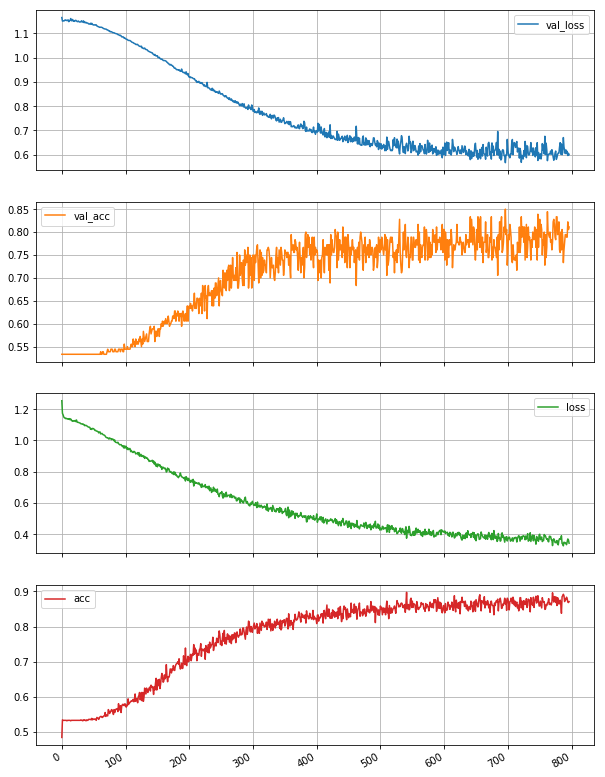

In [14]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [15]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "other"
    elif encodedLabel == 1:
        return "fizz"
    elif encodedLabel == 2:
        return "buzz"
    elif encodedLabel == 3:
        return "fizzbuzz"

In [16]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

output = {}
output["input"] = testData['input']
output["label"] = testData['label']
output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 26  Correct :74
Testing Accuracy: 74.0


In [17]:
2003

2003

In [18]:
2005

2005